<a href="https://colab.research.google.com/github/sudhakar2003/XGBoost-Home-Price-Prediction/blob/main/XGBoost_Home_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/house_price_prediction.csv')
data.head()

,income,schools,hospitals,crime_rate,price
0,70979,3,8,2,48751
1,130829,8,11,2,36987
2,142055,1,5,1,19890
3,30627,11,10,10,50906
4,151835,10,9,1,18557


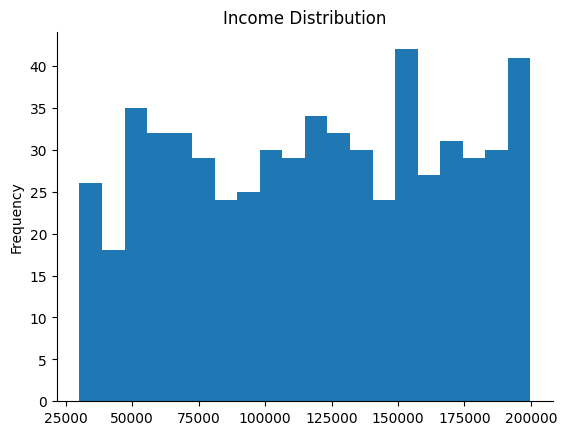

In [32]:
data['income'].plot(kind='hist', bins=20, title='Income Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:

# Split dataset into features and target variable
X = data[['income', 'schools', 'hospitals', 'crime_rate']]
y = data['price']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost model
model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 273650153.0098975
R^2 Score: -0.014300097687289348


In [34]:
#  Predict price for a new house
new_house = [[60000, 8, 5, 0.03]]  # Income, schools, hospitals, crime rate
predicted_price = model.predict(new_house)
print(f"Predicted Price for the New House: {predicted_price[0]}")

Predicted Price for the New House: 37030.98046875
